<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on practice lab: Model Development**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired in throughout the module, and use linear regression principles to create a model that predicts the Price of the laptop, based on one or more attributes of the dataset.


# Objectives

After completing this lab you will be able to:

 - Use Linear Regression in one variable to fit the parameters to a model
 - Use Linear Regression in multiple variables to fit the parameters to a model
 - Use Polynomial Regression in single variable tofit the parameters to a model
 - Create a pipeline for performing linear regression using multiple features in polynomial scaling
 - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [1]:
import piplite
await piplite.install('seaborn')

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

### Importing the dataset
Run the cell below to download the dataset into this environment.

This function will download the dataset into your browser


In [3]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

We put the file path along with a quotation mark so that pandas will read the file into a dataframe from that address. The file path can be either an URL or your local file address.


In [4]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

You will need to download the dataset using the download() function:


In [5]:
#you will need to download the dataset;
await download(path, "laptops.csv")
file_name="laptops.csv"

Load the dataset into a pandas dataframe


In [6]:
df = pd.read_csv(file_name, header=0)

>Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply skip the steps above, and simply use the URL directly in the pandas.read_csv() function. You can uncomment and run the statements in the cell below.


In [ ]:
#https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
#df = pd.read_csv(filepath, header=None)

In [7]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 : Single Linear Regression

You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.


In [12]:
# Write your code below and press Shift+Enter to execute 
lm = LinearRegression()
x = df[['CPU_frequency']]
y = df[['Price']]
lm.fit(x,y)
yHat = lm.predict(x)

array([[1073.07834392],
       [1277.93263722],
       [1636.42765051],
       [1073.07834392],
       [1175.50549057]])

Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?


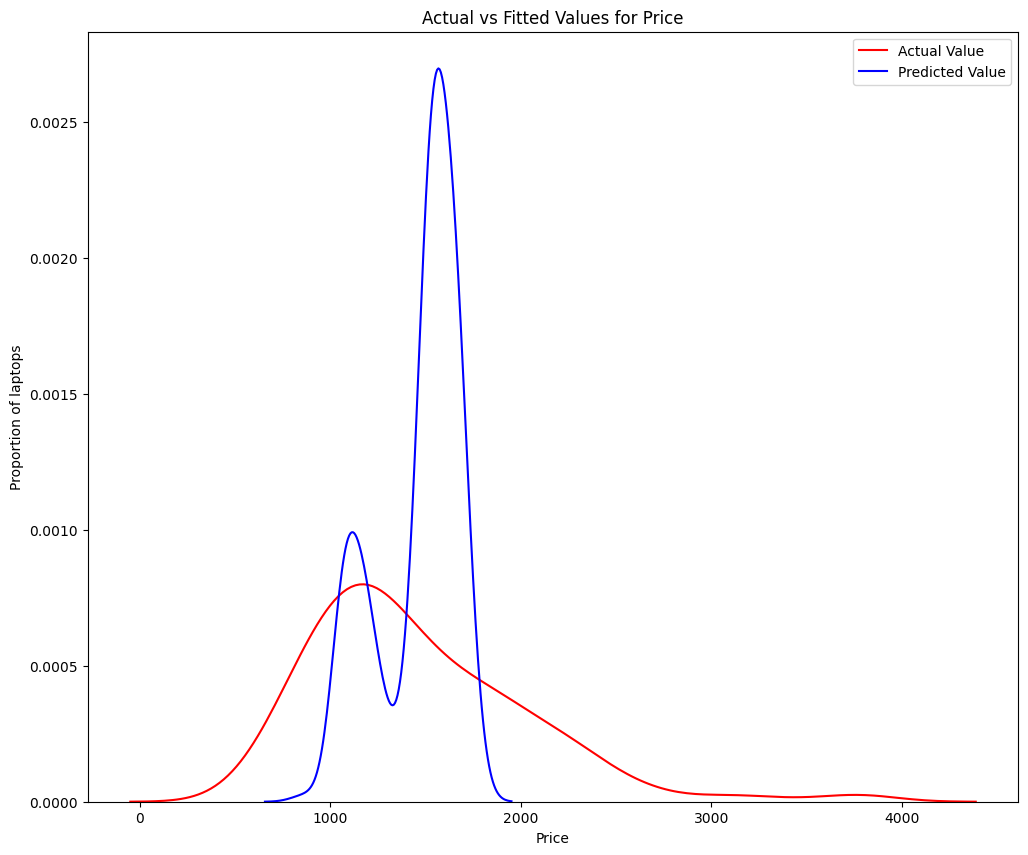

In [14]:
# Write your code below and press Shift+Enter to execute 
plt.figure(figsize=(12, 10))
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(yHat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Evaluate the Mean Squared Error and R^2 score values for the model. 


In [15]:
# Write your code below and press Shift+Enter to execute 
r2 = lm.score(x,y)
print("The R^2 is: ", r2)
MSE = mean_squared_error(df['Price'], yHat)
print("The MSE is: ", MSE)

The R^2 is:  0.13444363210243238
The MSE is:  284583.44058686297


# Task 2 - Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system. 


In [17]:
# Write your code below and press Shift+Enter to execute 
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD', 'CPU_core','OS','GPU','Category']]
lm2 = LinearRegression()
lm2.fit(Z, y)
yHat = lm2.predict(Z)

Plot the Distribution graph of the predicted values as well as the Actual values


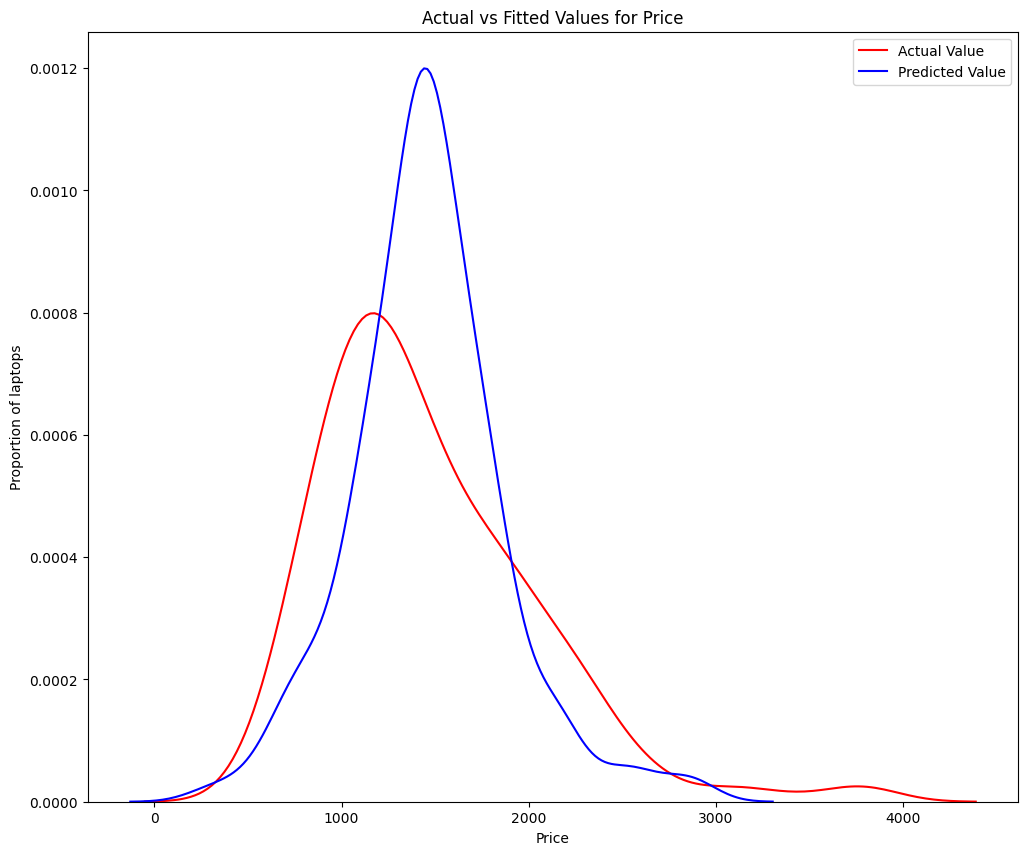

In [18]:
# Write your code below and press Shift+Enter to execute
plt.figure(figsize=(12, 10))
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(yHat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?


In [22]:
# Write your code below and press Shift+Enter to execute
R2 = lm2.score(Z, y)
print("The R^2 score is: ", R2)
MSE2 = mean_squared_error(df['Price'], yHat)
print("The MSE score is: ", MSE2)

The R^2 score is:  0.5082509055187374
The MSE score is:  161680.57263893107


# Task 3 - Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`. 


In [29]:
#  Write your code below and press Shift+Enter to execute
f1 = np.polyfit(df['CPU_frequency'],df['Price'], 1)
p1 = np.poly1d(f1)

f2 = np.polyfit(df['CPU_frequency'],df['Price'], 3)
p2 = np.poly1d(f2)

f3 = np.polyfit(df['CPU_frequency'],df['Price'], 5)
p3 = np.poly1d(f3)

In [30]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

Call this function for the 3 models created and get the required graphs.


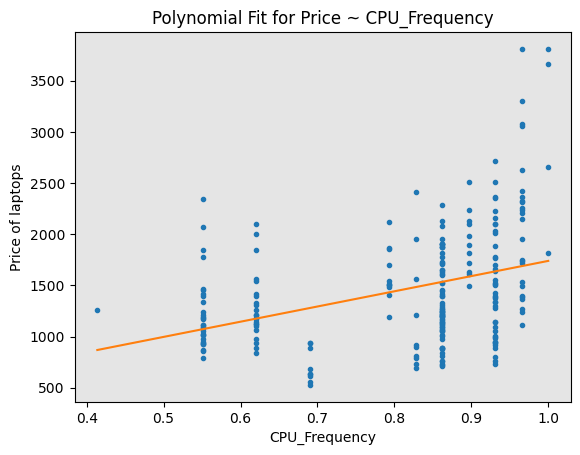

In [33]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 1
PlotPolly(p1, df[['CPU_frequency']], df[['Price']], 'CPU_Frequency')

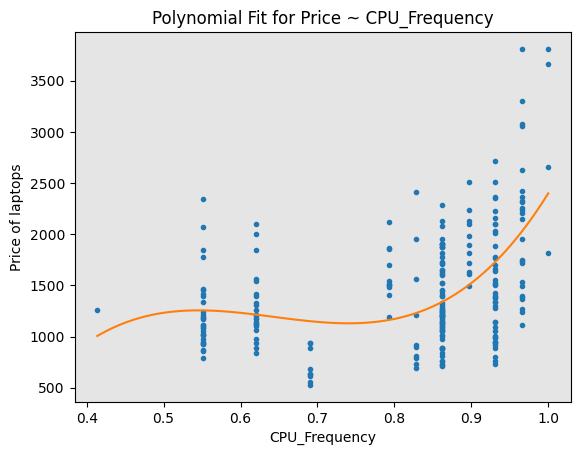

In [36]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 3
PlotPolly(p2, df[['CPU_frequency']], df[['Price']], 'CPU_Frequency')

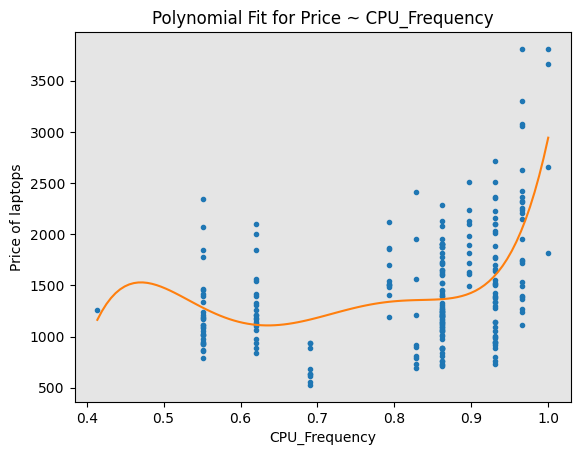

In [37]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 5
PlotPolly(p3, df[['CPU_frequency']], df[['Price']], 'CPU_Frequency')

Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.


In [39]:
#  Write your code below and press Shift+Enter to execute
R2_p1 = r2_score(df['Price'],p1(x))
MSE_p1 = mean_squared_error(df['Price'], p1(x))
print("The R^2 score for linear is:", R2_p1)
print("The MSE for linear is: ", MSE_p1)

R2_p2 = r2_score(df['Price'],p2(x))
MSE_p2 = mean_squared_error(df['Price'], p2(x))
print("The R^2 score for 2nd degree is:", R2_p2)
print("The MSE for 2nd degree is: ", MSE_p2)

R2_p3 = r2_score(df['Price'],p3(x))
MSE_p3 = mean_squared_error(df['Price'], p3(x))
print("The R^2 score for 3rd degree is:", R2_p3)
print("The MSE for 3rd degree is: ", MSE_p3)

The R^2 score for linear is: 0.13444363210243282
The MSE for linear is:  284583.4405868628
The R^2 score for 2nd degree is: 0.26692640796530986
The MSE for 2nd degree is:  241024.8630384881
The R^2 score for 3rd degree is: 0.3030822706443803
The MSE for 3rd degree is:  229137.29548053825


# Task 4 - Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline. 


In [41]:
#  Write your code below and press Shift+Enter to execute
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype('float')
pipe.fit(Z,df['Price'])
ypipe = pipe.predict(Z)

Evaluate the MSE and R^2 values for the this predicted output.


In [43]:
#  Write your code below and press Shift+Enter to execute
R2_pipe = r2_score(df['Price'],ypipe)
MSE_pipe = mean_squared_error(df['Price'], ypipe)
print("The R^2 score is:", R2_pipe)
print("The MSE score is:", MSE_pipe)

The R^2 score is: 0.2563325298426047
The MSE score is: 244507.9894957983


You should now have seen that the values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


Copyright © 2023 IBM Corporation. All rights reserved.
